<a href="https://colab.research.google.com/github/Slzl/SVM/blob/main/SVM%20_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/content/Cryptocurrency.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = '/content/Cryptocurrency.csv'
df = pd.read_csv(data)

In [ ]:
df.shape

(8559, 12)

In [ ]:
df_pd = pd.DataFrame(df)
df_pd.rename(columns = {'Price Usd':'Price_Usd'}, inplace = True)

In [ ]:
df.head()

,Name,Symbol,Price_Usd,Volume24h,Volume30d,MarketCap,Dominance,YtdPriceChangePercentage,cmcRank,marketPairCount,circulatingSupply,totalSupply
0,Bitcoin,BTC,24620.849470,3.745915e+10,4.820000e+11,4.750000e+11,42.6334,48.0946,1,9982,1.929256e+07,1.929256e+07
1,Ethereum,ETH,1688.699934,1.243162e+10,1.500000e+11,2.070000e+11,18.5435,40.6119,2,9982,1.223739e+08,1.223739e+08
2,Tether,USDT,1.000223,5.244734e+10,6.490000e+11,6.980130e+10,6.2660,0.0531,3,9982,6.978573e+10,7.314177e+10
3,BNB,BNB,321.785343,9.556956e+08,1.056193e+10,5.080931e+10,4.5601,31.8052,4,9982,1.578982e+08,1.599800e+08
4,USD Coin,USDC,1.000039,5.046872e+09,7.770599e+10,4.151303e+10,3.7254,0.0046,5,9982,4.151139e+10,4.151139e+10


In [ ]:
col_names = df.columns
col_names

Index(['Name', 'Symbol', 'Price_Usd', 'Volume24h', 'Volume30d', 'MarketCap',
       'Dominance', 'YtdPriceChangePercentage', 'cmcRank', 'marketPairCount',
       'circulatingSupply', 'totalSupply'],
      dtype='object')

In [ ]:
df['marketPairCount'].value_counts()

1       4280
9982    4279
Name: marketPairCount, dtype: int64

In [ ]:
df['marketPairCount'].value_counts()/np.float(len(df))

1       0.500058
9982    0.499942
Name: marketPairCount, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8559 entries, 0 to 8558
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      8559 non-null   object 
 1   Symbol                    8559 non-null   object 
 2   Price_Usd                 8559 non-null   float64
 3   Volume24h                 8559 non-null   float64
 4   Volume30d                 8559 non-null   float64
 5   MarketCap                 8559 non-null   float64
 6   Dominance                 8559 non-null   float64
 7   YtdPriceChangePercentage  8559 non-null   float64
 8   cmcRank                   8559 non-null   int64  
 9   marketPairCount           8559 non-null   int64  
 10  circulatingSupply         8559 non-null   float64
 11  totalSupply               8559 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 802.5+ KB


In [ ]:
df.isnull().sum()

Name                        0
Symbol                      0
Price_Usd                   0
Volume24h                   0
Volume30d                   0
MarketCap                   0
Dominance                   0
YtdPriceChangePercentage    0
cmcRank                     0
marketPairCount             0
circulatingSupply           0
totalSupply                 0
dtype: int64

In [ ]:
round(df.describe(),2)

,Price_Usd,Volume24h,Volume30d,MarketCap,Dominance,YtdPriceChangePercentage,cmcRank,marketPairCount,circulatingSupply,totalSupply
count,8559.00,8.559000e+03,8.559000e+03,8.559000e+03,8559.00,8.559000e+03,8559.00,8559.00,8.559000e+03,8.559000e+03
mean,157.11,1.803037e+07,3.194654e+08,1.358948e+08,0.01,1.012127e+07,4280.00,4990.92,1.591387e+14,2.085933e+15
std,5964.31,7.241718e+08,1.009673e+10,5.713494e+09,0.51,9.326537e+08,2470.91,4990.79,1.074083e+16,3.666778e+16
min,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,-1.000000e+02,1.00,1.00,0.000000e+00,0.000000e+00
25%,0.00,7.928000e+01,2.396280e+03,0.000000e+00,0.00,-2.980000e+00,2140.50,1.00,0.000000e+00,3.425135e+06
50%,0.01,7.291430e+03,2.144182e+05,0.000000e+00,0.00,1.963000e+01,4280.00,1.00,0.000000e+00,1.489956e+08
75%,0.09,1.116917e+05,3.265517e+06,9.085793e+04,0.00,5.320000e+01,6419.50,9982.00,8.953728e+06,1.141749e+09
max,522027.81,5.244734e+10,6.490000e+11,4.750000e+11,42.63,8.628369e+10,8559.00,9982.00,9.820000e+17,1.000000e+18


Text(0, 0.5, 'totalSupply')

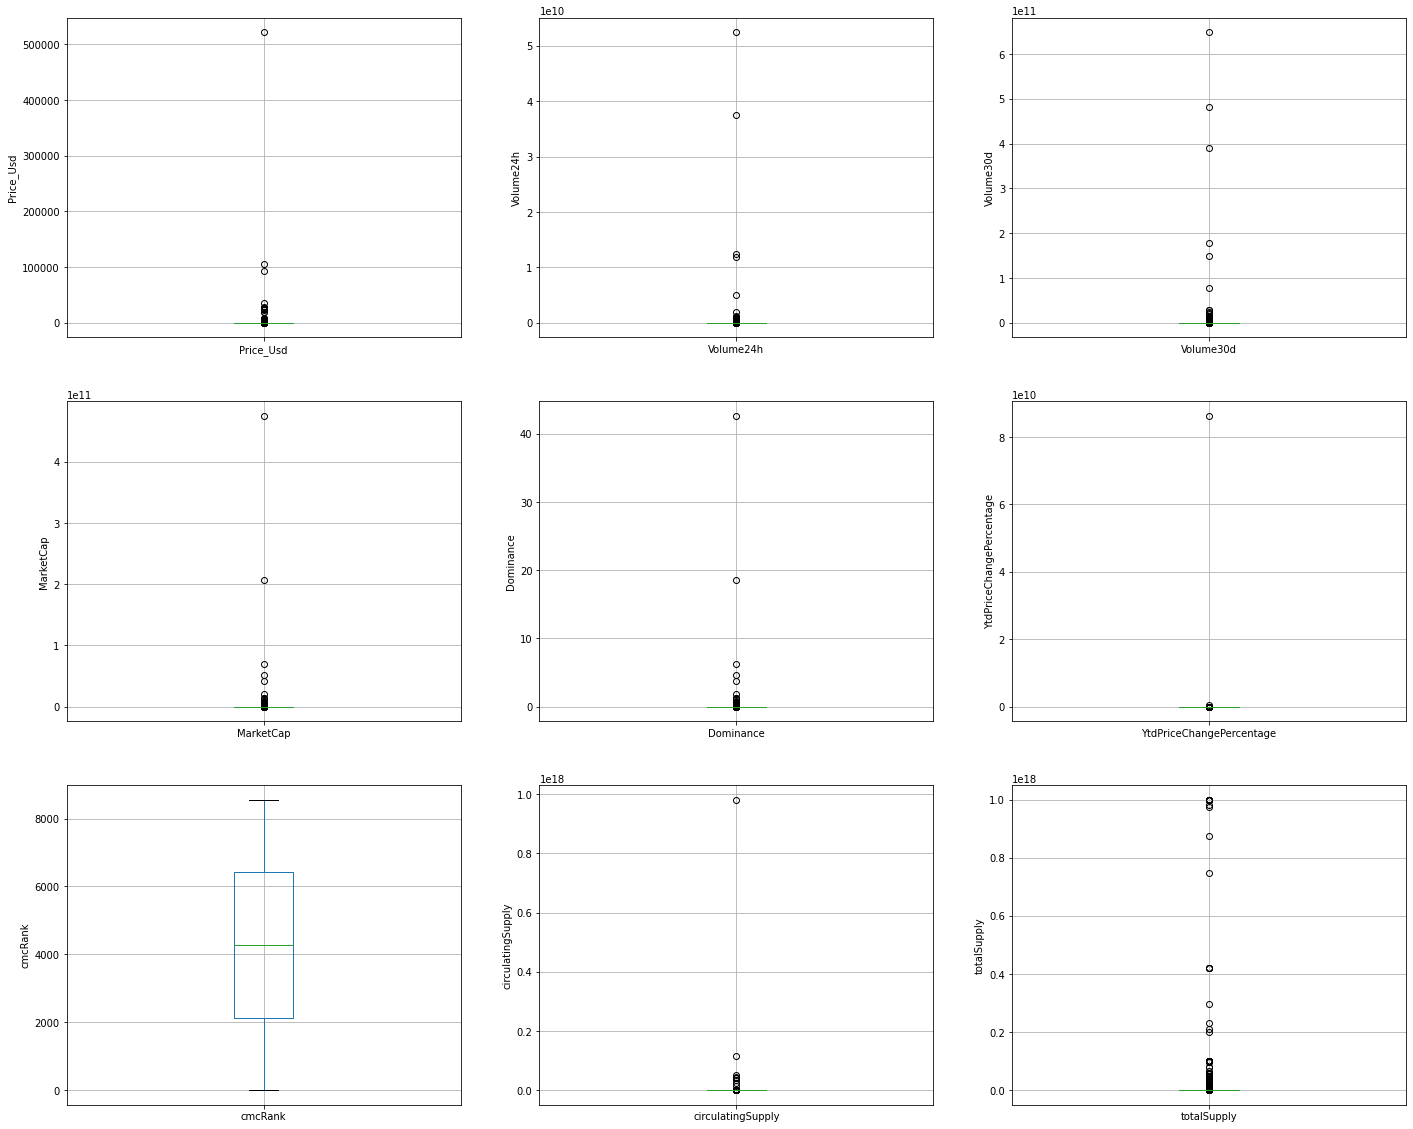

In [ ]:
plt.figure(figsize=(24,20))
plt.subplot(3, 3, 1)
fig = df.boxplot(column='Price_Usd')
fig.set_title('')
fig.set_ylabel('Price_Usd')
plt.subplot(3, 3, 2)
fig = df.boxplot(column='Volume24h')
fig.set_title('')
fig.set_ylabel('Volume24h')
plt.subplot(3, 3, 3)
fig = df.boxplot(column='Volume30d')
fig.set_title('')
fig.set_ylabel('Volume30d')
plt.subplot(3, 3, 4)
fig = df.boxplot(column='MarketCap')
fig.set_title('')
fig.set_ylabel('MarketCap')
plt.subplot(3, 3, 5)
fig = df.boxplot(column='Dominance')
fig.set_title('')
fig.set_ylabel('Dominance')
plt.subplot(3, 3, 6)
fig = df.boxplot(column='YtdPriceChangePercentage')
fig.set_title('')
fig.set_ylabel('YtdPriceChangePercentage')
plt.subplot(3, 3, 7)
fig = df.boxplot(column='cmcRank')
fig.set_title('')
fig.set_ylabel('cmcRank')
plt.subplot(3, 3, 8)
fig = df.boxplot(column='circulatingSupply')
fig.set_title('')
fig.set_ylabel('circulatingSupply')
plt.subplot(3, 3, 9)
fig = df.boxplot(column='totalSupply')
fig.set_title('')
fig.set_ylabel('totalSupply')

Text(0, 0.5, 'Cryptocurrency')

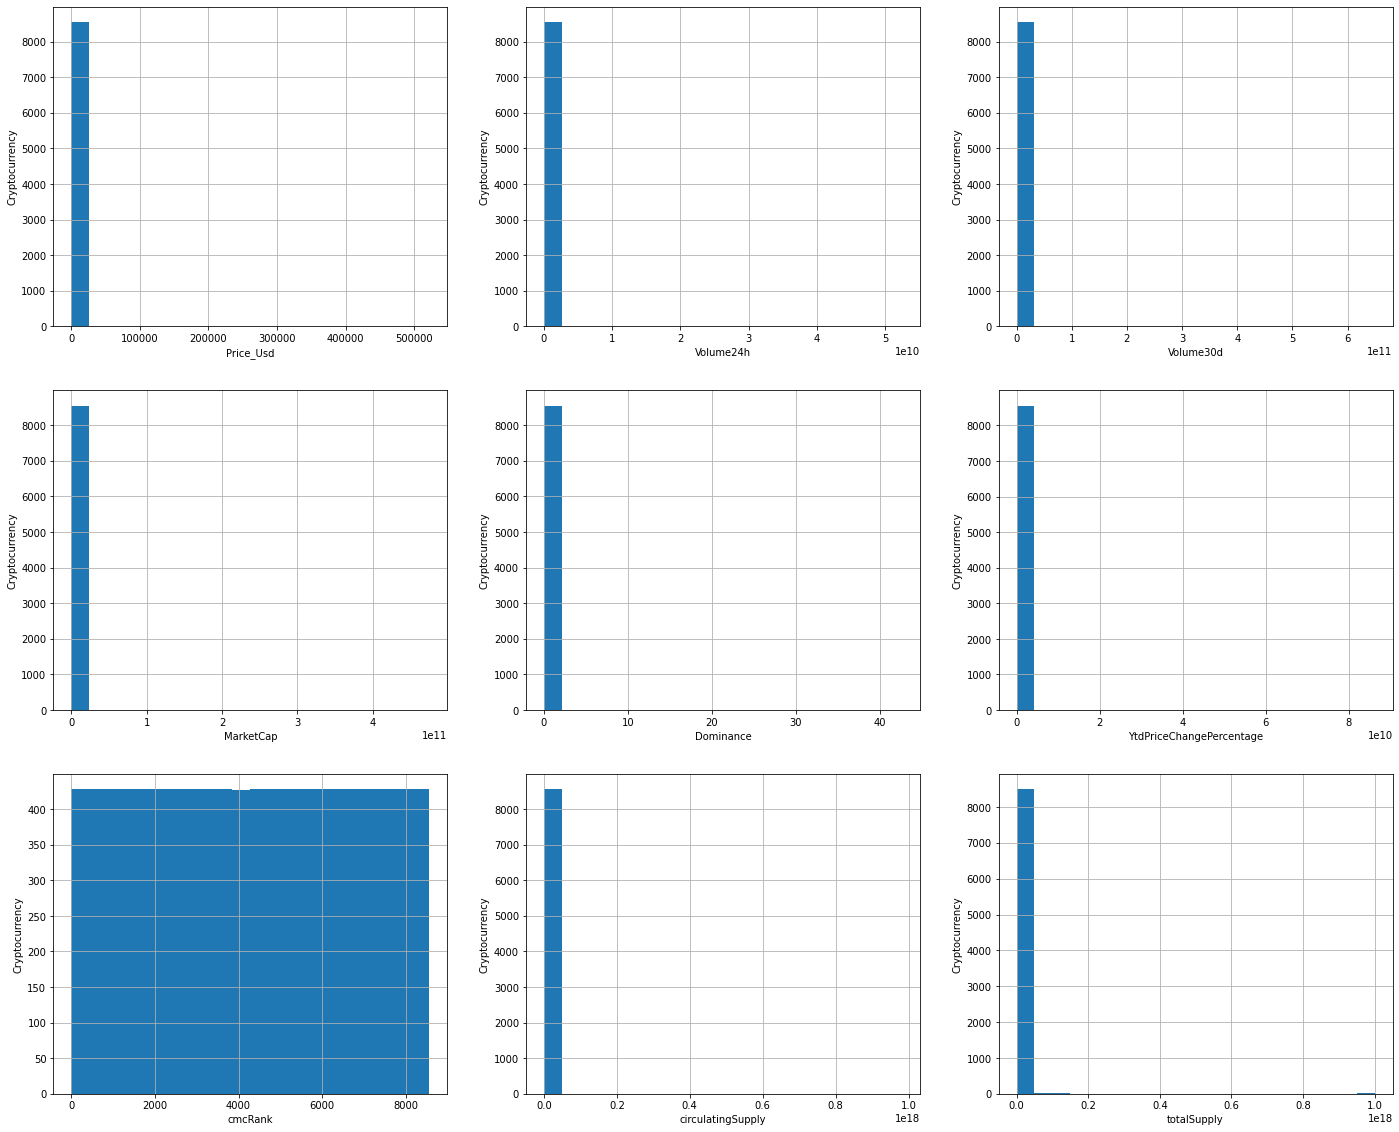

In [ ]:
plt.figure(figsize=(24,20))
plt.subplot(3, 3, 1)
fig = df['Price_Usd'].hist(bins=20)
fig.set_xlabel('Price_Usd')
fig.set_ylabel('Cryptocurrency')
plt.subplot(3, 3, 2)
fig = df['Volume24h'].hist(bins=20)
fig.set_xlabel('Volume24h')
fig.set_ylabel('Cryptocurrency')
plt.subplot(3, 3, 3)
fig = df['Volume30d'].hist(bins=20)
fig.set_xlabel('Volume30d')
fig.set_ylabel('Cryptocurrency')
plt.subplot(3, 3, 4)
fig = df['MarketCap'].hist(bins=20)
fig.set_xlabel('MarketCap')
fig.set_ylabel('Cryptocurrency')
plt.subplot(3, 3, 5)
fig = df['Dominance'].hist(bins=20)
fig.set_xlabel('Dominance')
fig.set_ylabel('Cryptocurrency')
plt.subplot(3, 3, 6)
fig = df['YtdPriceChangePercentage'].hist(bins=20)
fig.set_xlabel('YtdPriceChangePercentage')
fig.set_ylabel('Cryptocurrency')
plt.subplot(3, 3, 7)
fig = df['cmcRank'].hist(bins=20)
fig.set_xlabel('cmcRank')
fig.set_ylabel('Cryptocurrency')
plt.subplot(3, 3, 8)
fig = df['circulatingSupply'].hist(bins=20)
fig.set_xlabel('circulatingSupply')
fig.set_ylabel('Cryptocurrency')
plt.subplot(3, 3, 9)
fig = df['totalSupply'].hist(bins=20)
fig.set_xlabel('totalSupply')
fig.set_ylabel('Cryptocurrency')

In [ ]:
X = df.drop(['Name','Symbol','marketPairCount'], axis=1)
y = df['marketPairCount']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((6847, 9), (1712, 9))

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,Price_Usd,Volume24h,Volume30d,MarketCap,Dominance,YtdPriceChangePercentage,cmcRank,circulatingSupply,totalSupply
count,6.847000e+03,6.847000e+03,6.847000e+03,6.847000e+03,6.847000e+03,6.847000e+03,6.847000e+03,6.847000e+03,6.847000e+03
mean,-4.150973e-18,3.113229e-18,-1.556615e-17,-1.556615e-18,5.707587e-18,3.113229e-18,-1.463218e-16,9.858560e-18,-1.141517e-17
std,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00
min,-2.720628e-02,-2.639598e-02,-3.304138e-02,-2.468854e-02,-2.404951e-02,-1.213418e-02,-1.727988e+00,-2.661056e-02,-5.829242e-02
25%,-2.720623e-02,-2.639588e-02,-3.304117e-02,-2.468854e-02,-2.404951e-02,-1.213408e-02,-8.644620e-01,-2.661056e-02,-5.829242e-02
50%,-2.720538e-02,-2.638683e-02,-3.302195e-02,-2.468854e-02,-2.404951e-02,-1.213406e-02,-5.792180e-03,-2.661056e-02,-5.829242e-02
75%,-2.719213e-02,-2.625950e-02,-3.275364e-02,-2.467396e-02,-2.404951e-02,-1.213403e-02,8.615777e-01,-2.661056e-02,-5.829239e-02
max,7.853157e+01,6.477513e+01,5.750337e+01,7.439443e+01,7.442397e+01,8.273991e+01,1.735017e+00,6.532535e+01,2.687060e+01


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 1.0000


In [ ]:
svc=SVC(C=100.0) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 1.0000


In [ ]:
svc=SVC(C=1000.0) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 1.0000


In [ ]:
linear_svc=SVC(kernel='linear', C=1.0) 
linear_svc.fit(X_train,y_train)
y_pred_test=linear_svc.predict(X_test)
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 1.0000


In [ ]:
linear_svc100=SVC(kernel='linear', C=100.0) 
linear_svc100.fit(X_train, y_train)
y_pred=linear_svc100.predict(X_test)
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 1.0000


In [ ]:
linear_svc1000=SVC(kernel='linear', C=1000.0) 
linear_svc1000.fit(X_train, y_train)
y_pred=linear_svc1000.predict(X_test)
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 1.0000


In [ ]:
y_pred_train = linear_svc.predict(X_train)
y_pred_train

array([9982, 9982,    1, ...,    1, 9982, 9982])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9991


In [ ]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9991
Test set score: 1.0000


In [ ]:
y_test.value_counts()

1       873
9982    839
Name: marketPairCount, dtype: int64

In [ ]:
null_accuracy = (3306/(3306+274))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


In [ ]:
poly_svc=SVC(kernel='poly', C=1.0) 
poly_svc.fit(X_train,y_train)
y_pred=poly_svc.predict(X_test)
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9100


In [ ]:
poly_svc100=SVC(kernel='poly', C=100.0) 
poly_svc100.fit(X_train, y_train)
y_pred=poly_svc100.predict(X_test)
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9544


In [ ]:
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 
sigmoid_svc.fit(X_train,y_train)
y_pred=sigmoid_svc.predict(X_test)
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.9994


In [ ]:
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 
sigmoid_svc100.fit(X_train,y_train)
y_pred=sigmoid_svc100.predict(X_test)
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.9930


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[873   0]
 [  0 839]]

True Positives(TP) =  873

True Negatives(TN) =  839

False Positives(FP) =  0

False Negatives(FN) =  0


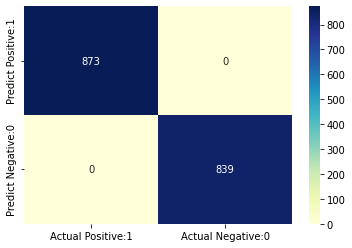

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       873
        9982       1.00      1.00      1.00       839

    accuracy                           1.00      1712
   macro avg       1.00      1.00      1.00      1712
weighted avg       1.00      1.00      1.00      1712



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 1.0000


In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0000


In [ ]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [ ]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [ ]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 1.0000


In [ ]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


In [ ]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


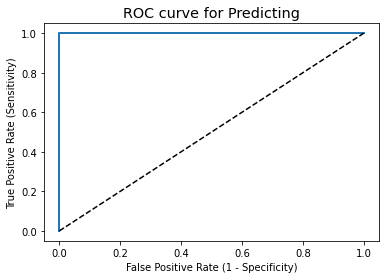

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test,pos_label=9982)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 1.0000


In [ ]:
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 1.0000
